In [1]:
!pip install -U albumentations
!pip install ttach
!pip install torch-lr-finder

In [2]:
!git clone "https://github.com/vvshankar78/Pytorch_Wrapper.git"
!git clone "https://github.com/jacobgil/pytorch-grad-cam.git"

fatal: destination path 'Pytorch_Wrapper' already exists and is not an empty directory.
fatal: destination path 'pytorch-grad-cam' already exists and is not an empty directory.


In [3]:
import requests, zipfile, io
import sys, os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torchvision
# Download Data
import requests, zipfile, io
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import OneCycleLR, ReduceLROnPlateau
from torchsummary import summary

import os
import urllib.request
import zipfile
from random import shuffle
from math import floor
import sys, os

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [4]:

my_path = '/content/Pytorch_Wrapper'
sys.path.append(my_path)
from config import ModelConfig
from data.data_download import download_dataset, unzip_data, format_val
from data import data_engine
from data.data_engine import DataEngine
import main

### Download TinyImage Data

In [5]:
main.download_data_prep()

Beginning dataset download with urllib2
Dataset downloaded
Extracting zip file: /content/tiny-imagenet-200.zip
Extracted at: /content
Formatting: /content/tiny-imagenet-200/val
Cleaning up: /content/tiny-imagenet-200/val/images
Formatting val done


### Generate Data Loader

In [6]:
data,train_loader, val_loader = main.get_data()

Model Parameters:
{ 'batch_size_cpu': 128,
  'batch_size_cuda': 256,
  'dataset': 'Imagenet',
  'dropout': 0,
  'dropout_value': 0.0,
  'epochs': 15,
  'l1_decay': 0,
  'l2_decay': 0.005,
  'lr': 0.001,
  'momentum': 0.9,
  'num_workers': 4,
  'peak': 5,
  'seed': 1,
  'target_zip': '/tiny-imagenet-200.zip',
  'train_data_path': '/tiny-imagenet-200/train',
  'train_data_path_engine': '/content/tiny-imagenet-200/train',
  'url': 'http://cs231n.stanford.edu/tiny-imagenet-200.zip',
  'val_data_path': '/tiny-imagenet-200/val',
  'val_data_path_engine': '/content/tiny-imagenet-200/val'}
15
generating datasets for Imagenet


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


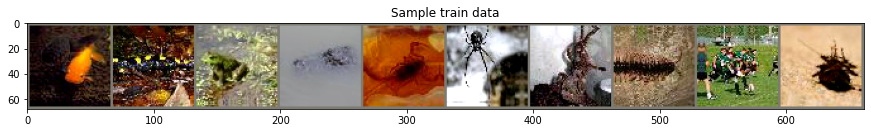

In [8]:
main.show_data(data)

### Load Model

In [11]:
model= main.get_model()
main.show_model_summary(model, (3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

### Get LR Finder

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.00E+01


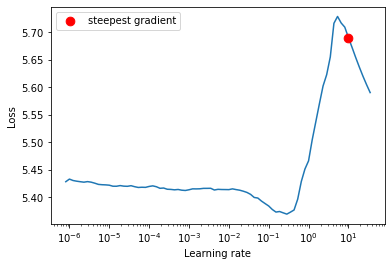

In [13]:
main.get_lr_finder(model, train_loader)

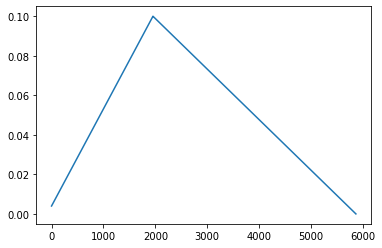

In [14]:
model= main.get_model()
main.get_ocp_plot(train_loader, model, max_lr=0.1) # max lr is considered 10 time suggested lr from lr finder

### Train Model

In [15]:
history = main.run_model(model, train_loader, val_loader, max_lr=0.1)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=3.955695390701294 Batch_id=390 Accuracy=7.77: 100%|██████████| 391/391 [01:37<00:00,  4.02it/s]

length of Average loss 391, length of Average accuracy 391

learning rate 0.023209825997952918



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0199, Accuracy: 723/10000 (7.23%)
EPOCH: 2


Loss=3.436305522918701 Batch_id=390 Accuracy=19.00: 100%|██████████| 391/391 [01:37<00:00,  4.01it/s]

length of Average loss 782, length of Average accuracy 782

learning rate 0.04241965199590583



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0159, Accuracy: 1585/10000 (15.85%)
EPOCH: 3


Loss=3.2447330951690674 Batch_id=390 Accuracy=27.76: 100%|██████████| 391/391 [01:37<00:00,  4.00it/s]

length of Average loss 1173, length of Average accuracy 1173

learning rate 0.06162947799385875



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0128, Accuracy: 2737/10000 (27.37%)
EPOCH: 4


Loss=3.0021169185638428 Batch_id=390 Accuracy=34.03: 100%|██████████| 391/391 [01:37<00:00,  4.01it/s]

length of Average loss 1564, length of Average accuracy 1564

learning rate 0.08083930399181168



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0110, Accuracy: 3434/10000 (34.34%)
EPOCH: 5


Loss=2.3841209411621094 Batch_id=390 Accuracy=39.57: 100%|██████████| 391/391 [01:37<00:00,  3.99it/s]

length of Average loss 1955, length of Average accuracy 1955

learning rate 0.09997442465473147



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0110, Accuracy: 3525/10000 (35.25%)
EPOCH: 6


Loss=2.1671853065490723 Batch_id=390 Accuracy=44.24: 100%|██████████| 391/391 [01:37<00:00,  4.01it/s]

length of Average loss 2346, length of Average accuracy 2346

learning rate 0.08997446465473147



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0103, Accuracy: 3896/10000 (38.96%)
EPOCH: 7


Loss=2.2440707683563232 Batch_id=390 Accuracy=48.30: 100%|██████████| 391/391 [01:37<00:00,  4.00it/s]

length of Average loss 2737, length of Average accuracy 2737

learning rate 0.07997450465473147



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0101, Accuracy: 4093/10000 (40.93%)
EPOCH: 8


Loss=1.9837310314178467 Batch_id=390 Accuracy=52.24: 100%|██████████| 391/391 [01:38<00:00,  3.99it/s]

length of Average loss 3128, length of Average accuracy 3128

learning rate 0.06997454465473146



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0089, Accuracy: 4677/10000 (46.77%)
EPOCH: 9


Loss=1.727364182472229 Batch_id=390 Accuracy=55.37: 100%|██████████| 391/391 [01:37<00:00,  4.01it/s]

length of Average loss 3519, length of Average accuracy 3519

learning rate 0.05997458465473146



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0086, Accuracy: 4788/10000 (47.88%)
EPOCH: 10


Loss=1.751695990562439 Batch_id=390 Accuracy=58.86: 100%|██████████| 391/391 [01:37<00:00,  4.00it/s]

length of Average loss 3910, length of Average accuracy 3910

learning rate 0.04997462465473146



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0082, Accuracy: 5091/10000 (50.91%)
EPOCH: 11


Loss=1.5007174015045166 Batch_id=390 Accuracy=62.02: 100%|██████████| 391/391 [01:37<00:00,  4.00it/s]

length of Average loss 4301, length of Average accuracy 4301

learning rate 0.03997466465473146



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0080, Accuracy: 5211/10000 (52.11%)
EPOCH: 12


Loss=1.611863374710083 Batch_id=390 Accuracy=65.40: 100%|██████████| 391/391 [01:37<00:00,  4.01it/s]

length of Average loss 4692, length of Average accuracy 4692

learning rate 0.029974704654731454



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0078, Accuracy: 5377/10000 (53.77%)
EPOCH: 13


Loss=1.2052346467971802 Batch_id=390 Accuracy=69.03: 100%|██████████| 391/391 [01:37<00:00,  4.01it/s]

length of Average loss 5083, length of Average accuracy 5083

learning rate 0.019974744654731466



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 5630/10000 (56.30%)
EPOCH: 14


Loss=1.2058628797531128 Batch_id=390 Accuracy=73.58: 100%|██████████| 391/391 [01:37<00:00,  4.02it/s]

length of Average loss 5474, length of Average accuracy 5474

learning rate 0.009974784654731464



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 5815/10000 (58.15%)
EPOCH: 15


Loss=0.5652318596839905 Batch_id=390 Accuracy=79.06: 100%|██████████| 391/391 [01:37<00:00,  3.99it/s]

length of Average loss 5865, length of Average accuracy 5865

learning rate -2.517534526855214e-05


Test set: Average loss: 0.0067, Accuracy: 6004/10000 (60.04%)


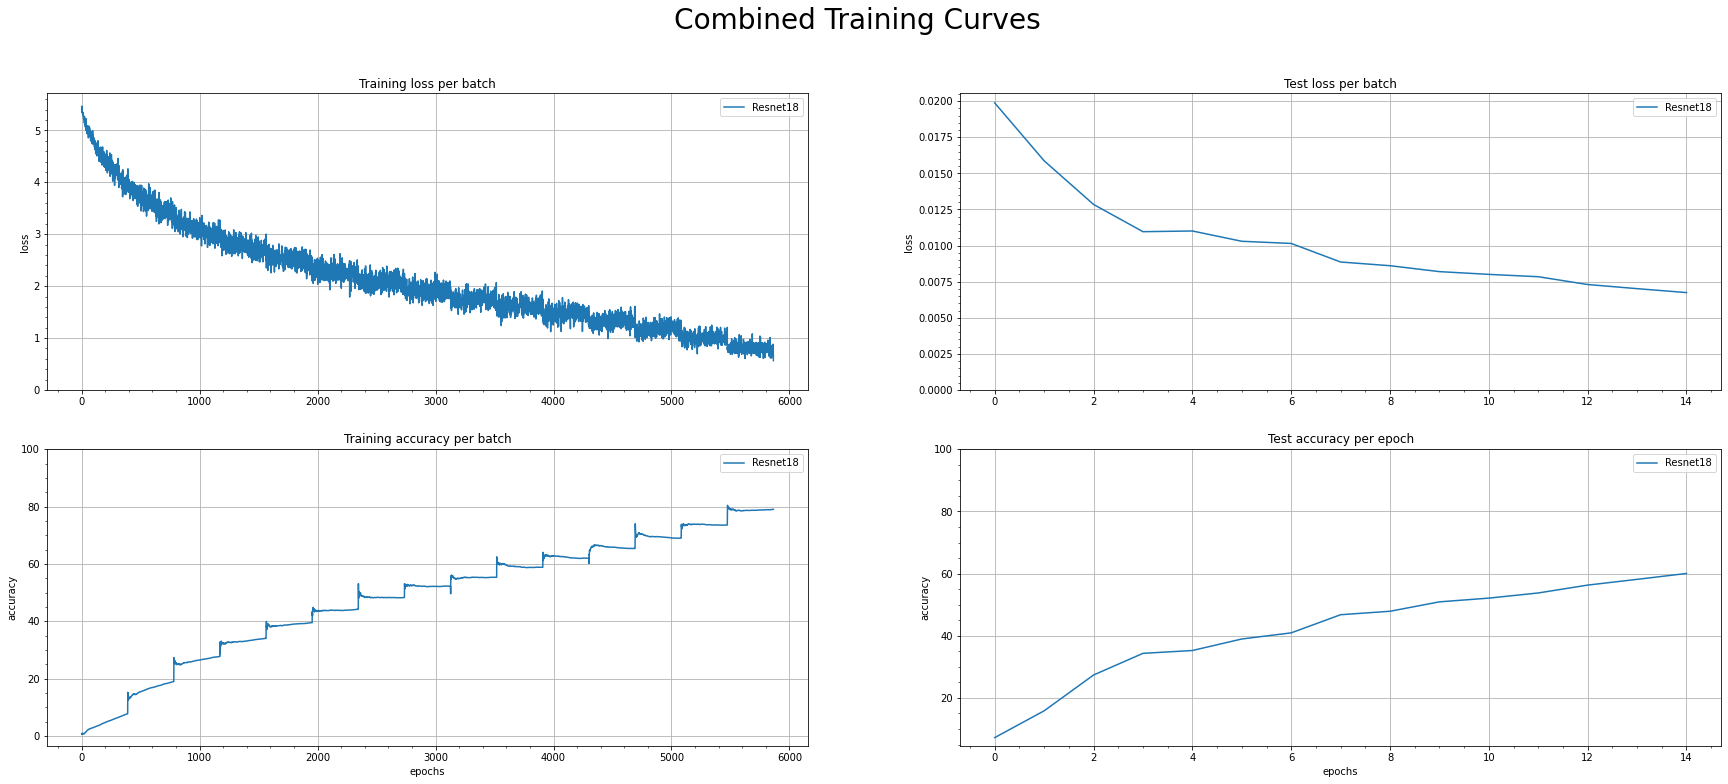

In [16]:
main.get_training_curves(history)